In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
df = pd.read_csv(r"D:\titanic_data\train.csv")

In [51]:
titanic_data = pd.read_csv(r"D:\titanic_data\train.csv")

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.shape

(891, 12)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
 df = df.drop(columns = 'Cabin', axis = 1)

In [58]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [59]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [61]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [62]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [63]:
print(df['Embarked'].mode()[0])

S


In [64]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [65]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [66]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [67]:
sns.set()

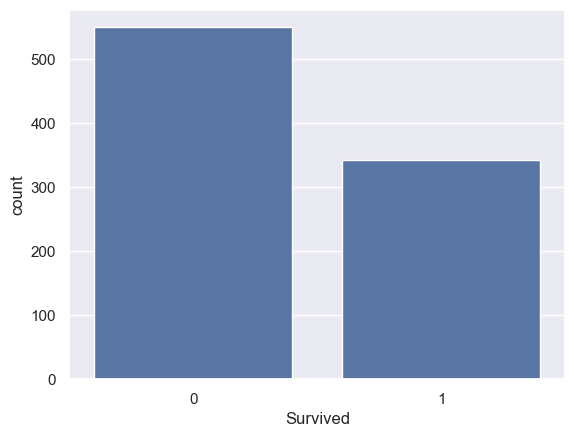

In [68]:
sns.countplot(x='Survived', data=titanic_data)
plt.show()

In [69]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

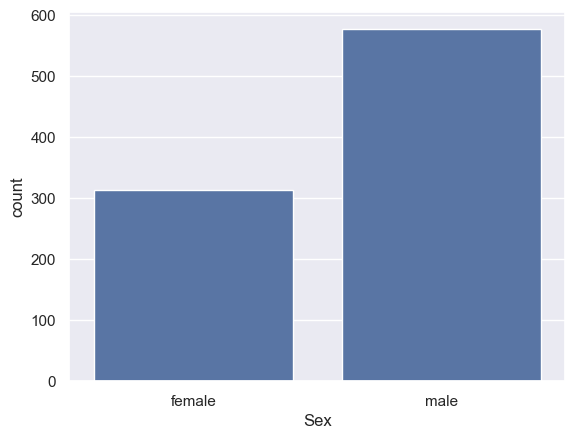

In [70]:
df['Sex'] = df['Sex'].astype('category')

sns.countplot(data=df, x='Sex')

<Axes: xlabel='Sex', ylabel='count'>

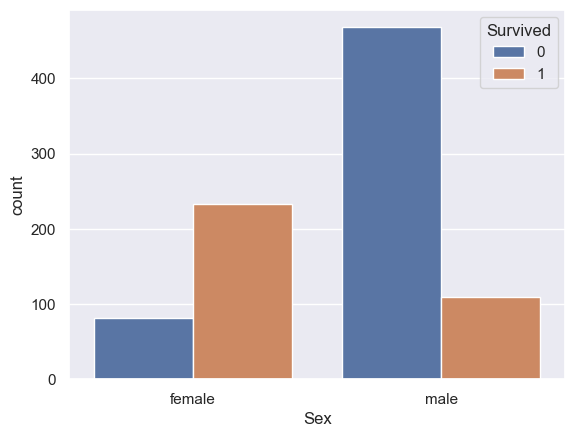

In [71]:
sns.countplot(x='Sex', hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

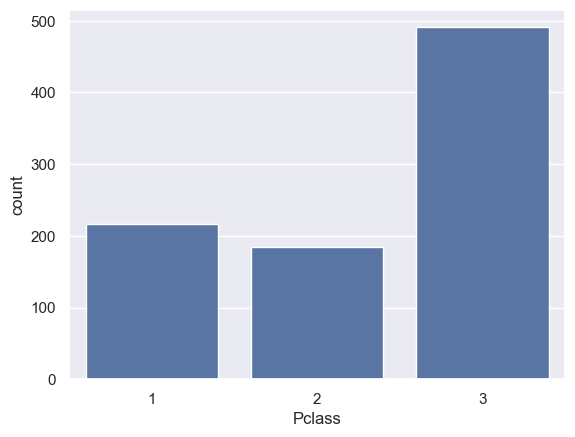

In [72]:
sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

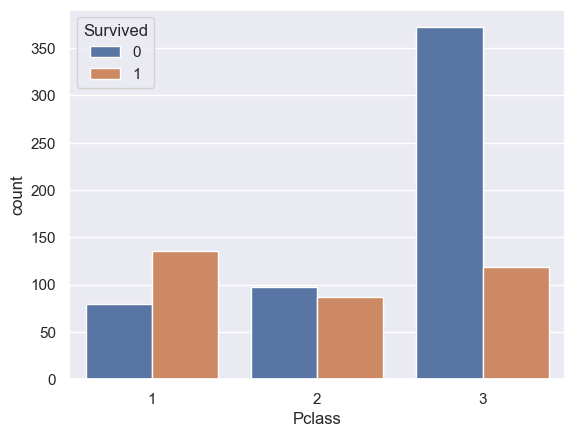

In [73]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [74]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [75]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [76]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [77]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']

In [78]:

print(X)

     Pclass Sex        Age  SibSp  Parch     Fare  Embarked
0         3   0  22.000000      1      0   7.2500         0
1         1   1  38.000000      1      0  71.2833         1
2         3   1  26.000000      0      0   7.9250         0
3         1   1  35.000000      1      0  53.1000         0
4         3   0  35.000000      0      0   8.0500         0
..      ...  ..        ...    ...    ...      ...       ...
886       2   0  27.000000      0      0  13.0000         0
887       1   1  19.000000      0      0  30.0000         0
888       3   1  29.699118      1      2  23.4500         0
889       1   0  26.000000      0      0  30.0000         1
890       3   0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [79]:

print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [81]:
print(X.shape, X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


In [82]:
model = LogisticRegression()

In [83]:
model.fit(X_train, Y_train)

c:\Users\jaywa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [84]:
x_train_pred = model.predict(X_train)

In [85]:
print(x_train_pred)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [86]:
training_data_accuracy = accuracy_score(Y_train, x_train_pred)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [87]:
x_test_pred = model.predict(X_test)

In [88]:
print(x_test_pred)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [89]:
test_data_accuracy = accuracy_score(Y_test, x_test_pred)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.7821229050279329


In [90]:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [91]:
!pip install flask

In [92]:
pip install --upgrade 

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [93]:
pip help install


Usage:   
  c:\Users\jaywa\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\jaywa\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\jaywa\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\jaywa\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\jaywa\AppData\Local\Programs\Python\Python312\python.exe -m pip install [options] <archive url/path> ...

Description:
  Install packages from:
  
  - PyPI (and other indexes) using requirement specifiers.
  - VCS project urls.
  - Local project directories.
  - Local or remote source archives.
  
  pip also supports installing from "requirements files", which provide
  an easy way to specify a whole environment to be installed.

Install Opti

In [94]:
pip install pyngrok

In [95]:
import subprocess
import os
from pyngrok import ngrok
#setup ngrok with authtoken

ngrok.set_auth_token("2e6T3sMFL9eobWO2k4oUyF7ZtMz_TusPYHdmmE1M15MHeG7")

#running flask app
os.system("nohup python -m flask run --no-reload &")

#opening ngrok tunnel to the flask app uding http protocol
proc = subprocess.Popen(["ngrok", "http", "5000"])

#Retrive ngrok's public url here
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://e36c-202-177-227-40.ngrok-free.app" -> "http://localhost:5000"


In [97]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

# Load the trained model
model = joblib.load('logistic_regression_model.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    # HTML form to take inputs
    html_form = """
    <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Titanic Survival Prediction</title>
    <style>
        body {
            background-color: black;
            color: white;
            font-family: Arial, sans-serif;
            text-align: center;
            padding: 20px;
        }
        #predictionForm {
            display: inline-block;
            text-align: left;
        }
        img {
            max-width: 100%;
            height: auto;
        }
    </style>
</head>
<body>
    <h2>Titanic Survival Prediction</h2>
    <form id="predictionForm" method="post" action="/predict">
        <label for="pclass">Pclass:</label>
        <input type="text" id="pclass" name="pclass"><br><br>

        <label for="sex">Sex (0 for male, 1 for female):</label>
        <input type="text" id="sex" name="sex"><br><br>

        <label for="age">Age:</label>
        <input type="text" id="age" name="age"><br><br>

        <label for="sibsp">SibSp:</label>
        <input type="text" id="sibsp" name="sibsp"><br><br>

        <label for="parch">Parch:</label>
        <input type="text" id="parch" name="parch"><br><br>

        <label for="fare">Fare:</label>
        <input type="text" id="fare" name="fare"><br><br>

        <label for="embarked">Embarked (0 for S, 1 for C, 2 for Q):</label>
        <input type="text" id="embarked" name="embarked"><br><br>

        <button type="button" onclick="predictSurvival()">Predict</button>
    </form>

    <p id="predictionResult"></p>

    <img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" alt="Titanic Image">

    <script>
        function predictSurvival() {
            var xhr = new XMLHttpRequest();
            var url = "/predict";
            var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

            xhr.open("POST", url, true);
            xhr.onreadystatechange = function () {
                if (xhr.readyState === 4 && xhr.status === 200) {
                    var response = JSON.parse(xhr.responseText);
                    document.getElementById("predictionResult").innerHTML = "Survival Prediction: " + response.prediction;
                }
            };
            xhr.send(data);
        }
    </script>
</body>
</html>

    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    pclass = request.form['pclass']
    sex = request.form['sex']
    age = request.form['age']
    sibsp = request.form['sibsp']
    parch = request.form['parch']
    fare = request.form['fare']
    embarked = request.form['embarked']

    # Convert data to appropriate types
    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare = float(fare)
    embarked = int(embarked)

    # Make prediction
    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]

    return jsonify({'prediction': int(prediction)})

def run_flask_app():
    # Run Flask app on port 5000
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()

t=2024-12-13T19:54:13+0530 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=eaad0ce68489f426 err="failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2qAIM0reyjhtJKPbT7X6Orn54TN, tn_2qAIMKFGMQumdB4x1J9zkT81xwh, tn_2qAK2Vl6LDkEerYB15mEHUuzPdt\n\r\n\r\nERR_NGROK_324\r\n"


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2qAIM0reyjhtJKPbT7X6Orn54TN, tn_2qAIMKFGMQumdB4x1J9zkT81xwh, tn_2qAK2Vl6LDkEerYB15mEHUuzPdt\n\r\n\r\nERR_NGROK_324\r\n"}}
